# Supervised Machine Learning :Simple Linear Regression 

We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
#import the data

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


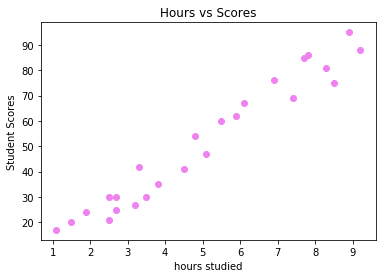

In [6]:
#Exploring the data 
plt.scatter(df.Hours,df.Scores,color='VIOLET')
plt.title("Hours vs Scores")
plt.xlabel('hours studied')
plt.ylabel('Student Scores')
plt.show()

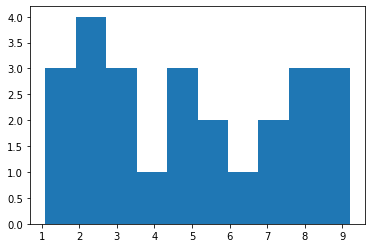

In [7]:
plt.hist(df.Hours)
plt.show()

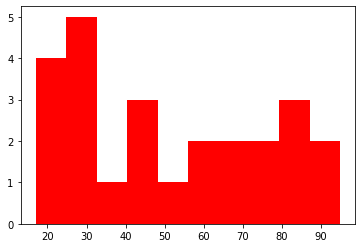

In [8]:
plt.hist(df.Scores,color='red')
plt.show()

As we can see from the graph that there is a positive linear relation between the number of hours studied and percentage of score.

## Creating test and train data :

In [9]:
X=df.Hours.values
y=df.Scores.values

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
#We splited our data into testing and training sets; 80% of the data is  for training and the 20% is for testing. 

In [11]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test= X_test.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

Text(0, 0.5, 'Student Scores')

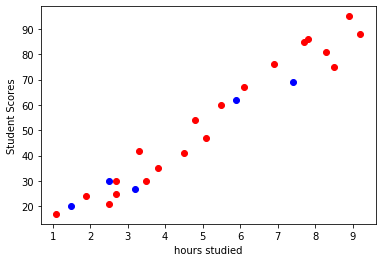

In [12]:
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_test,y_test,color='blue')
plt.xlabel('hours studied')
plt.ylabel('Student Scores')

## Training the model :

In [13]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.intercept_

array([2.01816004])

In [15]:
reg.coef_

array([[9.91065648]])

We know that in linear regression the equation has the form Y= a + bX, where Y is the dependent variable (that's the variable that goes on the Y axis), X is the independent variable (i.e. it is plotted on the X axis), b is the slope of the line and a is the y-intercept.Therefore, our equation will be:

Y=9.9* x + 2

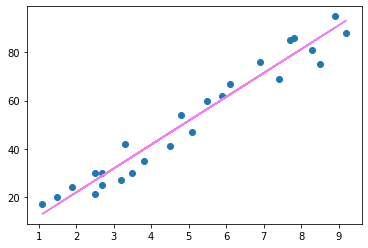

In [16]:
line= reg.intercept_[0] + reg.coef_[0][0]*X
plt.scatter(X, y)
plt.plot(X, line, color='violet');
plt.show()

## Prediction and Evaluation :

In [17]:
print(X_test) 
y_pred = reg.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [18]:
# Comparing Actual vs Predicted
compare= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) 
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# We can also test with our own input data
hrs = np.array(float(input("Enter the no. of hours studied :"))).reshape(-1,1)
inp_pred = reg.predict(hrs)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(inp_pred[0]))

Enter the no. of hours studied :10.7
No of Hours = [[10.7]]
Predicted Score = [108.06218438]


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
#Evaluating the model

Mean Absolute Error: 4.183859899002975
